In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json

In [2]:
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 20


In [3]:
# with open('../results/28_10V_10X_processed_1.json', 'r') as f1:
#     t_10_1, S_dyn_10_1 = np.transpose(json.load(f1))

with open('../results/28_10V_10X_processed_1.json', 'r') as f1:
    t_10_1, S_dyn_10_1 = np.transpose(json.load(f1))

with open('../results/28_10V_10X_processed_2.json', 'r') as f2:
    t_10_2, S_dyn_10_2 = np.transpose(json.load(f2))

with open('../results/28_10V_10X_processed_3.json', 'r') as f3:
    t_10_3, S_dyn_10_3 = np.transpose(json.load(f3))

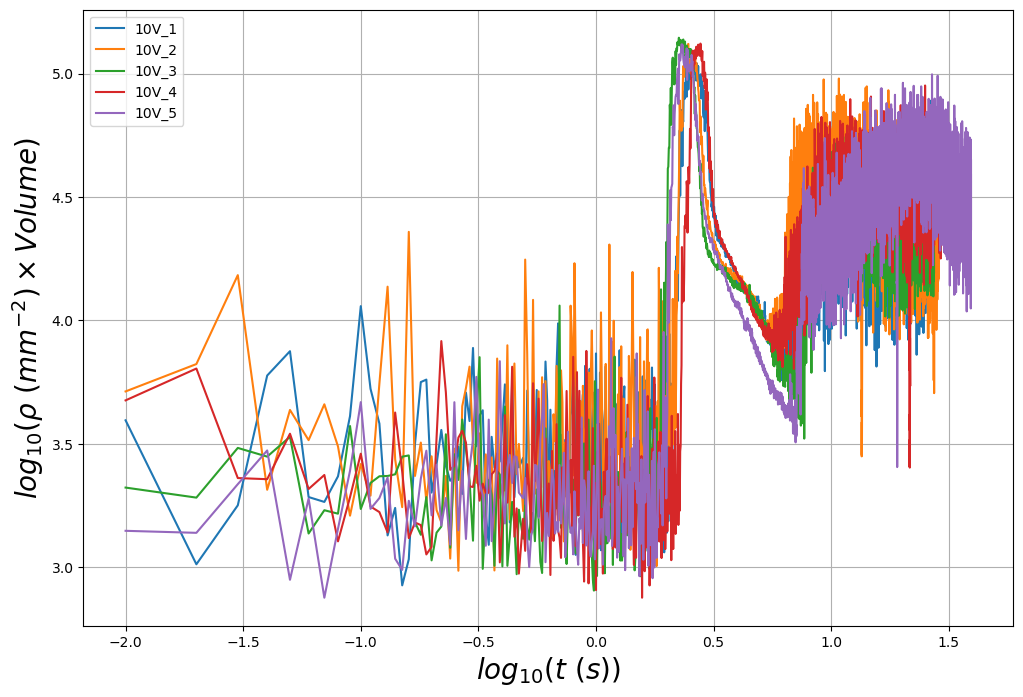

In [4]:
fig = plt.figure(figsize=(12, 8))

plt.plot(np.log10(t_10_1[:]), np.log10(S_dyn_10_1[:]), label = '10V_1')
plt.plot(np.log10(t_10_2[:]), np.log10(S_dyn_10_2[:]), label = '10V_2')
plt.plot(np.log10(t_10_3[:]), np.log10(S_dyn_10_3[:]), label = '10V_3')
plt.plot(np.log10(t_10_4[:]), np.log10(S_dyn_10_4[:]), label = '10V_4')
plt.plot(np.log10(t_10_5[:]), np.log10(S_dyn_10_5[:]), label = '10V_5')

plt.grid()
plt.xlabel(r'$log_{10}(t\ (s))$')
plt.ylabel(r'$log_{10}(\rho\ (mm^{-2}) \times Volume)$')
plt.legend()
# plt.savefig('../figs/raw-combind-rho_dyn.png')

## Late Time Coarsening Dynamics

In [5]:
print(np.where(np.log10(S_dyn_10_1[:]) == np.max(np.log10(S_dyn_10_1[:]))))
print(np.where(np.log10(S_dyn_10_2[:]) == np.max(np.log10(S_dyn_10_2[:]))))
print(np.where(np.log10(S_dyn_10_3[:]) == np.max(np.log10(S_dyn_10_3[:]))))
print(np.where(np.log10(S_dyn_10_4[:]) == np.max(np.log10(S_dyn_10_4[:]))))
print(np.where(np.log10(S_dyn_10_5[:]) == np.max(np.log10(S_dyn_10_5[:]))))


(array([258]),)
(array([243]),)
(array([222]),)
(array([274]),)
(array([229]),)


[0.00258788] -0.558193590368829


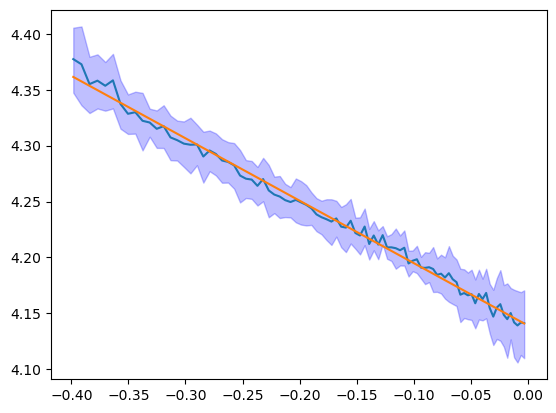

In [11]:
S_den_avg = np.array([np.average([S_dyn_10_1[258:858][i], S_dyn_10_2[243:843][i], S_dyn_10_3[222:822][i], S_dyn_10_4[274:874][i], S_dyn_10_5[229:829][i]]) for i in range(600)])
S_den_sd = np.array([np.std([S_dyn_10_1[258:858][i], S_dyn_10_2[243:843][i], S_dyn_10_3[222:822][i], S_dyn_10_4[274:874][i], S_dyn_10_5[229:829][i]]) for i in range(600)])
a, b = 60, 150
t = np.linspace(0, 3.99, 600)
plt.plot(np.log10(t[a:b]), np.log10(S_den_avg[a:b]))
res = np.polyfit(np.log10(t[a:b]), np.log10(S_den_avg[a:b]), deg=1, full=True)
plt.plot(np.log10(t[a:b]), res[0][0]*np.log10(t[a:b]) + res[0][1])
plt.fill_between(np.log10(t[a:b]), np.log10((S_den_avg-S_den_sd)[a:b]), np.log10((S_den_avg+S_den_sd)[a:b]), color='blue', alpha=0.25)
print(res[1], res[0][0])


In [47]:
res[1], res[0][0]

(array([0.05376864]), np.float64(-0.6447987583816548))

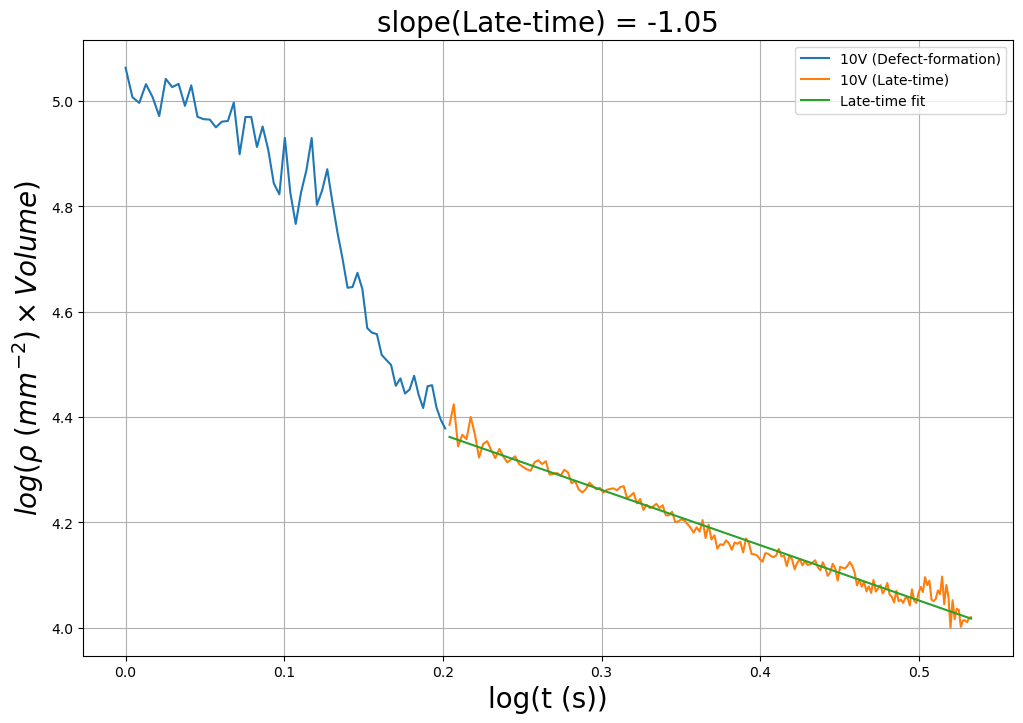

In [12]:
fig = plt.figure(figsize=(12, 8))

a1, b1, c1 = 258, 318, 498
t_10_1_ = t_10_1 - (t_10_1[a1] -1)
plt.plot(np.log10(t_10_1_[a1:b1]), np.log10(S_dyn_10_1[a1:b1]), label = '10V (Defect-formation)')
plt.plot(np.log10(t_10_1_[b1:c1]), np.log10(S_dyn_10_1[b1:c1]), label = '10V (Late-time)')

slope_, intersect_ = np.polyfit(np.log10(t_10_1_[b1:c1]), np.log10(S_dyn_10_1[b1:c1]), deg=1)
plt.title('slope(Late-time) = {:.2f}'.format(slope_))
plt.plot(np.log10(t_10_1_[b1:c1]), slope_ * np.log10(t_10_1_[b1:c1]) + intersect_, label = 'Late-time fit')


plt.grid()
plt.xlabel('log(t (s))')
plt.ylabel(r'$log(\rho\ (mm^{-2}) \times Volume)$')
plt.legend()
# plt.savefig('../figs/10V-rho_dyn.png')

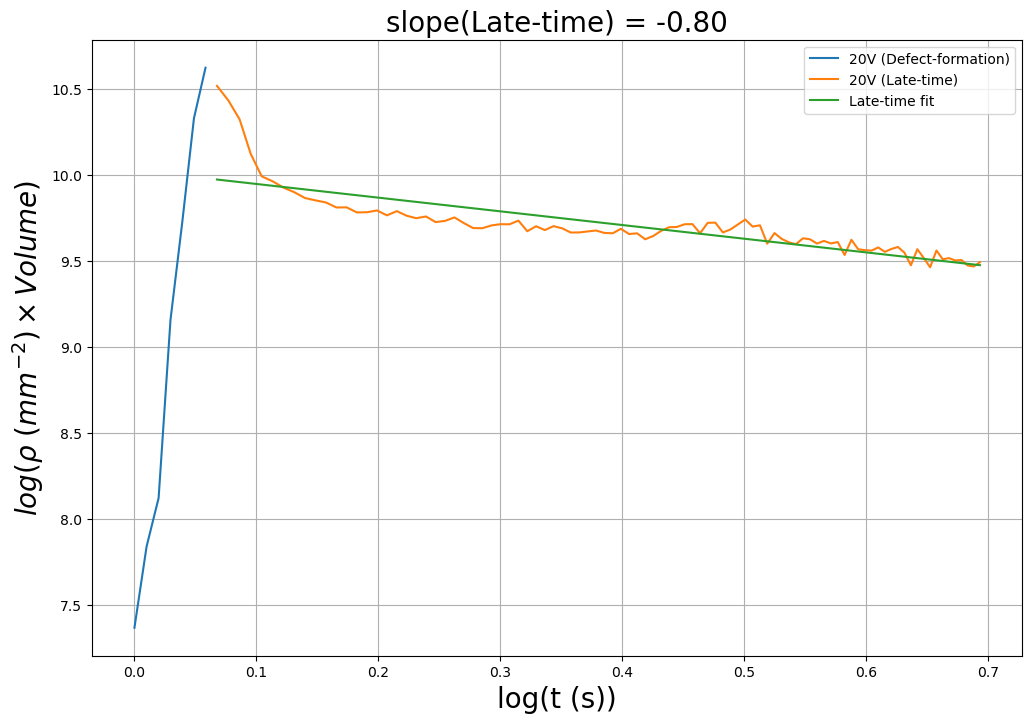

In [7]:
fig = plt.figure(figsize=(12, 8))

a2, b2, c2 = 78, 85, 178
t_20_ = t_20 - (t_20[a2] -1)
plt.plot(np.log10(t_20_[a2:b2]), np.log10(S_dyn_20[a2:b2]), label = '20V (Defect-formation)')
plt.plot(np.log10(t_20_[b2:c2]), np.log10(S_dyn_20[b2:c2]), label = '20V (Late-time)')

slope_, intersect_ = np.polyfit(np.log10(t_20_[b2:c2]), np.log10(S_dyn_20[b2:c2]), deg=1)
plt.title('slope(Late-time) = {:.2f}'.format(slope_))
plt.plot(np.log10(t_20_[b2:c2]), slope_ * np.log10(t_20_[b2:c2]) + intersect_, label = 'Late-time fit')

plt.grid()
plt.xlabel('log(t (s))')
plt.ylabel(r'$log(\rho\ (mm^{-2}) \times Volume)$')
plt.legend()
# plt.savefig('../figs/20V-rho_dyn.png')

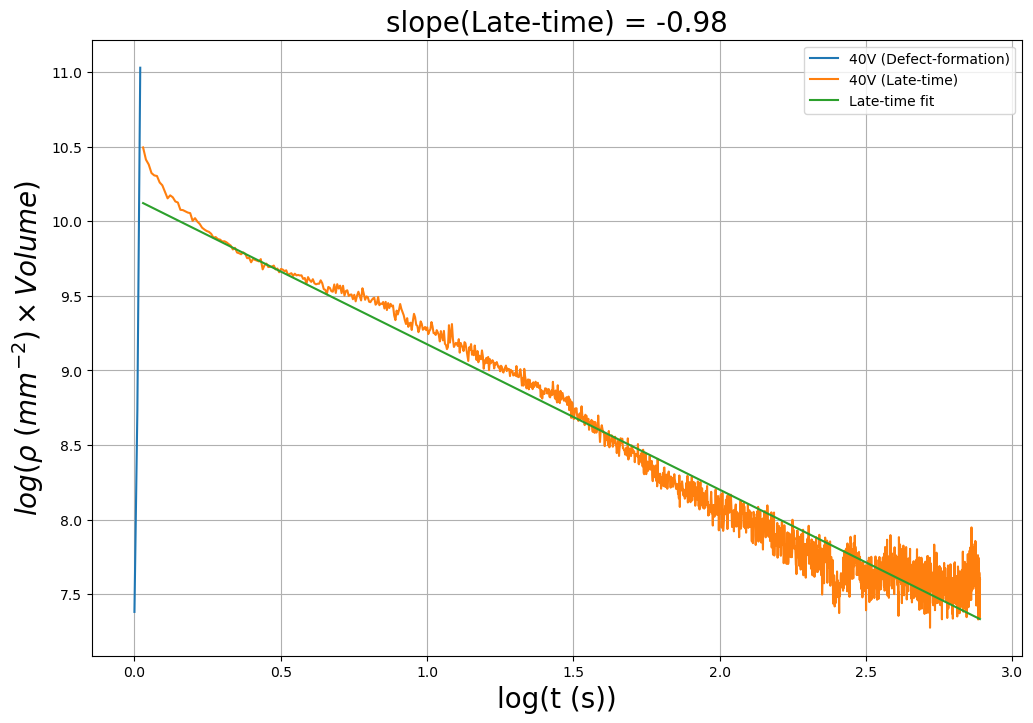

In [8]:
fig = plt.figure(figsize=(12, 8))

a4, b4, c4 = 123, 126, -1
t_40_ = t_40 - (t_40[a4] -1)
plt.plot(np.log10(t_40_[a4:b4]), np.log10(S_dyn_40[a4:b4]), label = '40V (Defect-formation)')
plt.plot(np.log10(t_40_[b4:c4]), np.log10(S_dyn_40[b4:c4]), label = '40V (Late-time)')

slope_, intersect_ = np.polyfit(np.log10(t_40_[b4:c4]), np.log10(S_dyn_40[b4:c4]), deg=1)
plt.title('slope(Late-time) = {:.2f}'.format(slope_))
plt.plot(np.log10(t_40_[b4:c4]), slope_ * np.log10(t_40_[b4:c4]) + intersect_, label = 'Late-time fit')

plt.grid()
plt.xlabel('log(t (s))')
plt.ylabel(r'$log(\rho\ (mm^{-2}) \times Volume)$')
plt.legend()
# plt.savefig('../figs/40V-rho_dyn.png')

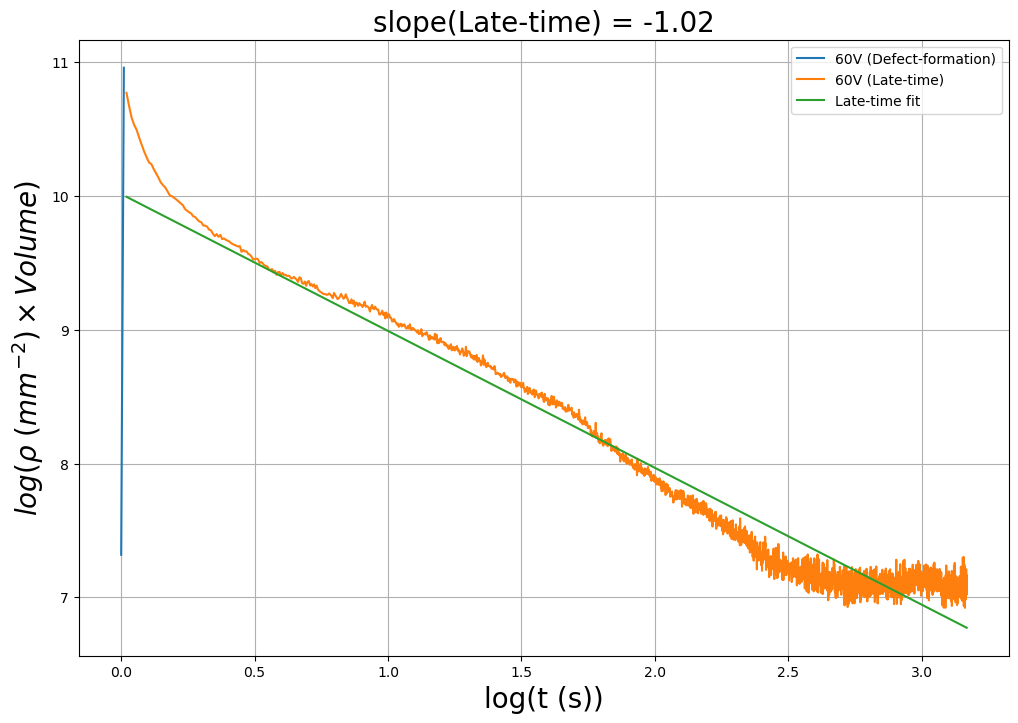

In [9]:
fig = plt.figure(figsize=(12, 8))

a6, b6, c6 = 120, 122, -1
t_60_ = t_60 - (t_60[a6] -1)
plt.plot(np.log10(t_60_[a6:b6]), np.log10(S_dyn_60[a6:b6]), label = '60V (Defect-formation)')
plt.plot(np.log10(t_60_[b6:c6]), np.log10(S_dyn_60[b6:c6]), label = '60V (Late-time)')

slope_, intersect_ = np.polyfit(np.log10(t_60_[b6:c6]), np.log10(S_dyn_60[b6:c6]), deg=1)
plt.title('slope(Late-time) = {:.2f}'.format(slope_))
plt.plot(np.log10(t_60_[b6:c6]), slope_ * np.log10(t_60_[b6:c6]) + intersect_, label = 'Late-time fit')

plt.grid()
plt.xlabel('log(t (s))')
plt.ylabel(r'$log(\rho\ (mm^{-2}) \times Volume)$')
plt.legend()
# plt.savefig('../figs/60V-rho_dyn.png')

## Defect Formation Dynamics

In [13]:
freq = 10e3 #10kHz
t_period = 1/freq


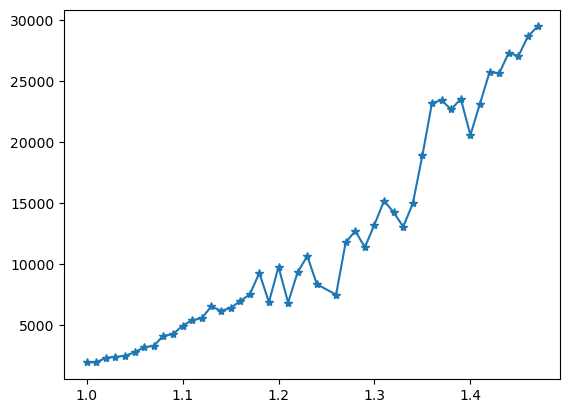

In [10]:

plt.plot(t_10_[a1:b1], S_dyn_10[a1:b1], '*-')

In [14]:
r10 = 10/t_period
r20 = 20/t_period
r40 = 40/t_period
r60 = 60/t_period



ramp_rate = [r10, r20, r40, r60]
ini_rho = [S_dyn_10[b1-1], S_dyn_20[b2-1], S_dyn_40[b4-1], S_dyn_60[b6-1]]

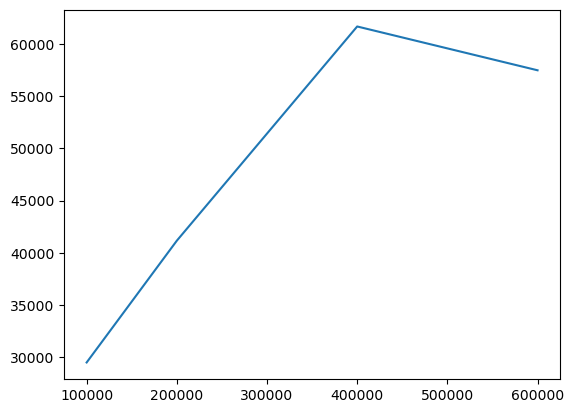

In [15]:
plt.plot(ramp_rate, ini_rho)

In [7]:
a = (1000 * 1000) * (0.068e-3)**2 ## mm^2
t = 8e-5 * 8.85e-12 / 16.2e-12 #m
t*10**3,  a

(0.04370370370370371, 0.004624)

5047.357926221335